<a href="https://colab.research.google.com/github/vkthakur90/jupyter_notebooks/blob/master/Colab_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Notebook created using Google colab

## Imports

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.linalg as la

## Creating sample input data

In [0]:
x = np.random.uniform(low = -50, high = 50, size = 100 * 100 + 1)
err = np.random.normal(loc = 0, scale = 5, size = 100 * 100 + 1)

In [3]:
data = pd.DataFrame(dict(x = x, e = err))
display(data.head())

,e,x
0,4.120372,-43.342447
1,5.154300,-6.359363
2,3.942046,15.588748
3,2.631900,-41.751290
4,-4.264183,-11.743101


## Creating model from data

\begin{equation}
    y = 10 + 15 x - 25 x^2
\end{equation}

In [4]:
data.eval('y = 10 + 15 * x - 25 * x ** 2 + e', inplace = True)
display(data.head())

,e,x,y
0,4.120372,-43.342447,-47600.208509
1,5.154300,-6.359363,-1091.273677
2,3.942046,15.588748,-5827.453688
3,2.631900,-41.751290,-44192.892890
4,-4.264183,-11.743101,-3617.921446


## Visualizing Raw Data

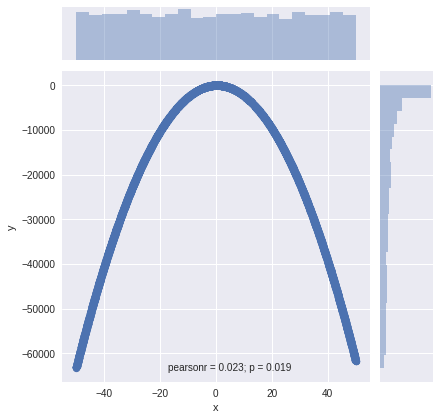

In [5]:
_ = sns.jointplot(x = 'x', y = 'y', data = data)

## Fitting linear model

In [6]:
design_matrix = pd.DataFrame({
    ('features', '1') : data['x'].apply(lambda x: 1),
    ('features', 'x') : data['x'],
    ('features', 'x**2') : data['x'].apply(lambda x: x**2),
    ('labels', 'y') : data['y']
})

display(design_matrix.head())

features                                labels
         1          x         x**2             y
0        1 -43.342447  1878.567687 -47600.208509
1        1  -6.359363    40.441501  -1091.273677
2        1  15.588748   243.009078  -5827.453688
3        1 -41.751290  1743.170218 -44192.892890
4        1 -11.743101   137.900430  -3617.921446

## Calculation of parameters using design matrix

In [0]:
X = np.matrix(design_matrix['features'])
Y = np.matrix(design_matrix['labels'])

In [0]:
C = la.inv(X.T * X) * (X.T * Y)

In [9]:
pd.DataFrame(C.T, columns = ['Intercept', 'x', 'I(x**2)'], index = ['coeff'])

,Intercept,x,I(x**2)
coeff,10.011925,14.999334,-25.000042
